In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import itertools
import time
from tqdm import tqdm
import sympy as sp
x = sp.var('x')
from sympy import Symbol
from sympy.solvers import solve
import math
import matplotlib.pyplot as plt
import plotly.express as px
import collections

import warnings
warnings.filterwarnings("ignore")

import cProfile

from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

# Import our adaptive module:
from adaptive_MDP import Adaptive

# Import non adaptive modules to compare:
import sys
sys.path.insert(0, 'C:/Users/jimmy/OneDrive/Desktop/Maestria Metodos Matematicos y Aplicaciones/Tesis/adaptive/code/disaggregated')
non_adaptive = __import__('non_adaptive', globals=None, locals=None, fromlist=(), level=0)
poly_utils = __import__('poly_utils', globals=None, locals=None, fromlist=(), level=0)
NonAdaptive = non_adaptive.NonAdaptive

In [11]:
# Initial parameters Our example with relapse (from chapter 2)----- #
mu = 0.00015
gamma = 0.0027
beta = 0.00096
phi = 0.0044

# R values:
Rmu = mu/(mu+ gamma)
Rphi = phi/(mu + gamma)

### Adaptive parameters

# Quadratic Utility functions:

b_s = 24 # Making the max utility attained at b_s/2 
b_i = 20 # Making the max utility attained at b_i/2 
b_z = 30 # Making the max utility attained at b_z/2 
a_s = 0
a_i = 0
a_z = 0
nu = 0.01375
tau = 12
delta = 0.9986

# Immediate rewards:
def u_s(a):
    return (b_s*a - a**2)**nu - a_s
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

### Simulation parameters
t_max = 10000
steps = 50
x00 = [9999, 1, 0]

In [12]:
# Initialize adaptive instances
# Testing stopping point
instance_adaptive = Adaptive(
    mu, gamma, beta, phi,
    tau, delta,
    u_s, u_i, u_z,
    t_max, steps, x00, max_contacts=30,
    logs=False, verbose=False, compute_max_t_threshold=1e-6)
instance_adaptive.patch_uni_solutions()

 57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 5725/10000 [02:46<02:04, 34.43it/s]


In [16]:
instance_adaptive.stopping_point

5725

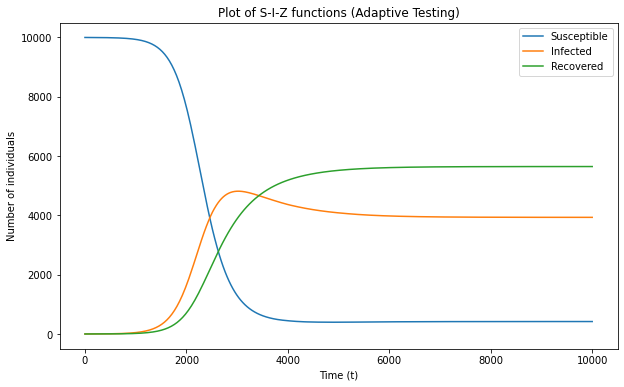

In [17]:
t = np.linspace(0, instance_adaptive.t_max, len(instance_adaptive.S))
instance_adaptive.plot_ode_solution(t = t, title = 'Adaptive Testing')

In [5]:
def run():
    instance_adaptive.patch_uni_solutions()

cProfile.run('run()')

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [05:50<00:00, 14.28it/s]


         181184128 function calls (180389186 primitive calls) in 291.119 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6500000   15.775    0.000   15.775    0.000 1183266056.py:26(u_s)
  6000000   16.156    0.000   16.156    0.000 1183266056.py:28(u_i)
  6500000   12.581    0.000   12.581    0.000 1183266056.py:30(u_z)
        1    0.000    0.000  350.131  350.131 3433005953.py:9(run)
   190000    0.264    0.000    2.440    0.000 <__array_function__ internals>:2(all)
    10000    0.020    0.000    0.187    0.000 <__array_function__ internals>:2(amax)
   200000    0.244    0.000    3.214    0.000 <__array_function__ internals>:2(any)
   180000    0.268    0.000    2.306    0.000 <__array_function__ internals>:2(argmax)
    15000    0.048    0.000    4.577    0.000 <__array_function__ internals>:2(concatenate)
   190000    0.347    0.000    1.201    0.000 <__array_function__ internals>:2(copyto)
    10000    0.025    0.00